---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    data = pd.read_csv('fraud_data.csv')
    fraud = len(data[data.Class==1])/len(data)
    return fraud

In [3]:
answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split  # New Sklearn
#from sklearn.cross_validation import train_test_split # sklearn 0.17.1

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    dum = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train) 
    return format(accuracy_score(y_test, dum.predict(X_test)), '.3f'), format(recall_score(y_test, dum.predict(X_test)), '.3f')

In [6]:
answer_two()

('0.985', '0.000')

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    clf = SVC().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return format(accuracy_score(y_test,y_pred), '.3f'), format(recall_score(y_test,y_pred), '.3f'), format(precision_score(y_test,y_pred), '.3f')

In [8]:
answer_three()

('0.991', '0.375', '1.000')

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [9]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    clf = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    
    return confusion_matrix(y_test, clf.predict(X_test))

In [10]:
answer_four()

array([[5340,    4],
       [  16,   64]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [25]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    import matplotlib.pyplot as plt
    %matplotlib notebook
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    
    lr= LogisticRegression().fit(X_train, y_train)
    y_scores_lr = lr.decision_function(X_test)
    y_pred = lr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_r = 0.75
    # convert (recall) to list and find the index of element (0.75)
    closest_zero_p = precision[list(recall).index(0.75)]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,8))
    #Precision Recall Curve
    ax[0].set_xlim([0.0, 1.01])
    ax[0].set_ylim([0.0, 1.01])
    ax[0].plot(precision, recall, lw = 2)
    ax[0].plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3, label = '')
    ax[0].set_xlabel('Precision', fontsize=16)
    ax[0].set_ylabel('Recall', fontsize=16)
    ax[0].set_aspect('equal')
    ax[0].legend()
    ax[0].set_title('Precision Recall Curve')
    
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_scores_lr)
    #ROC curve, Area-Under-Curve (AUC)
    ax[1].set_xlim([-0.01, 1.00])
    ax[1].set_ylim([-0.01, 1.01])
    ax[1].plot(fpr_lr, tpr_lr, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_score(y_test, y_scores_lr)))
    ax[1].set_xlabel('False Positive Rate', fontsize=16)
    ax[1].set_ylabel('True Positive Rate', fontsize=16)
    ax[1].set_title('ROC curve', fontsize=16)
    ax[1].legend(loc='lower right', fontsize=13)
    ax[1].plot(0.16, tpr_lr[list( np.round_(fpr_lr, decimals=3, out=None)).index(0.16)], 'o', markersize = 12, fillstyle = 'none', c='r', mew=3, label = '')
    ax[1].set_aspect('equal')
    
    plt.show()
    
    return closest_zero_r, tpr_lr[list( np.round_(fpr_lr, decimals=3, out=None)).index(0.16)]

<IPython.core.display.Javascript object>


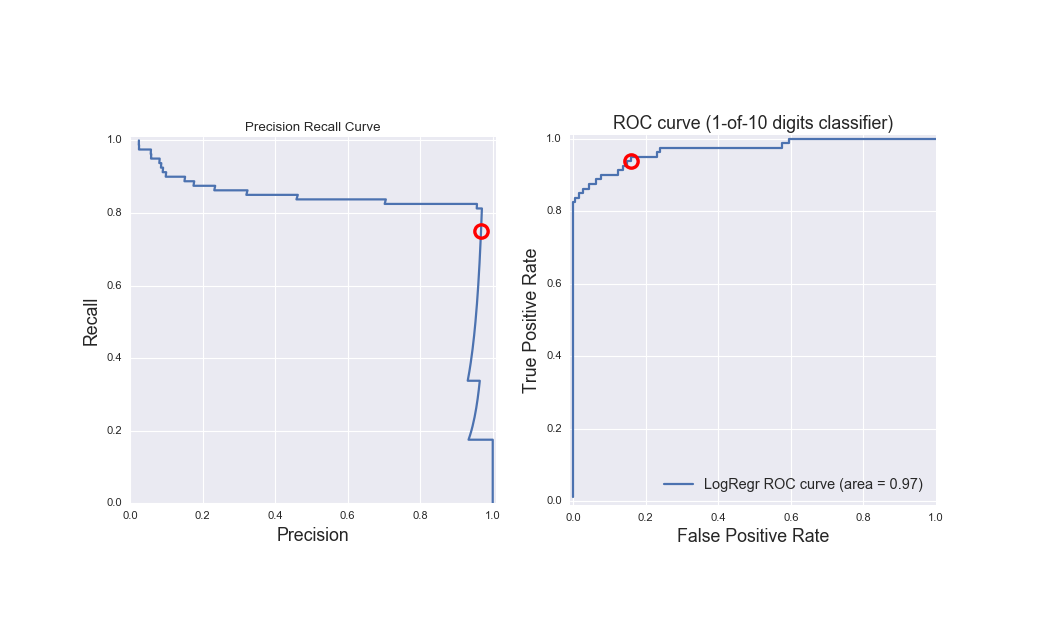

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(0.75, 0.9375)

In [24]:
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [40]:
def answer_six():  
    #from sklearn.grid_search import GridSearchCV  # fot sklearn 0.17.1
    from sklearn.model_selection import GridSearchCV # for new sklearn
    from sklearn.linear_model import LogisticRegression

    # penalty - regularization type (l1 - lasso regr., l2 - ridge regr.(set by default, lw^2))
    parameters = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    # set up a gridsearch
    grid_clf_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv = 3, error_score='recall')
    
    # apply a grid search
    rez_grid = grid_clf_lr.fit(X_train, y_train)
    
    #get tyhe rezults from gridserch
    rez = rez_grid.cv_results_
    
    # get the result for our task
    rez = rez['rank_test_score'].reshape(5,2)
    return  rez

In [41]:
answer_six()

array([[10,  9],
       [ 3,  1],
       [ 3,  2],
       [ 6,  5],
       [ 6,  6]])

In [47]:
    # show how it work
    #from sklearn.grid_search import GridSearchCV  # fot sklearn 0.17.1
    from sklearn.model_selection import GridSearchCV # for new sklearn
    from sklearn.linear_model import LogisticRegression

    # penalty - regularization type (l1 - lasso regr., l2 - ridge regr.(set by default, lw^2))
    parameters = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    
    # set up a gridsearch
    grid_clf_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv = 3, error_score='recall')
    
    # apply a grid search
    rez_grid = grid_clf_lr.fit(X_train, y_train)
    
    #get tyhe rezults from gridserch
    rez = rez_grid.cv_results_

In [48]:
rez

{'mean_fit_time': array([ 0.0503362 ,  0.12200697,  0.0733374 ,  0.22601295,  0.13734118,
         0.28101603,  0.35968725,  0.29735033,  0.38035512,  0.31101783]),
 'mean_score_time': array([ 0.00200017,  0.00166686,  0.0016667 ,  0.00200017,  0.0013334 ,
         0.00200009,  0.00133348,  0.00166678,  0.00166678,  0.0016667 ]),
 'mean_test_score': array([ 0.99422214,  0.99539001,  0.99606614,  0.99618907,  0.99606614,
         0.9961276 ,  0.99588174,  0.9959432 ,  0.99588174,  0.99588174]),
 'mean_train_score': array([ 0.99449874,  0.99569734,  0.9964042 ,  0.99665007,  0.9965886 ,
         0.9965886 ,  0.99665007,  0.99665007,  0.99665007,  0.99665007]),
 'param_C': masked_array(data = [0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2'],
              mask = [False False False False False False Fals

In [49]:
# get the result for our task
rez['rank_test_score']

array([10,  9,  3,  1,  3,  2,  6,  5,  6,  6])

In [50]:
rez['rank_test_score'].reshape(5,2)

array([[10,  9],
       [ 3,  1],
       [ 3,  2],
       [ 6,  5],
       [ 6,  6]])

<IPython.core.display.Javascript object>


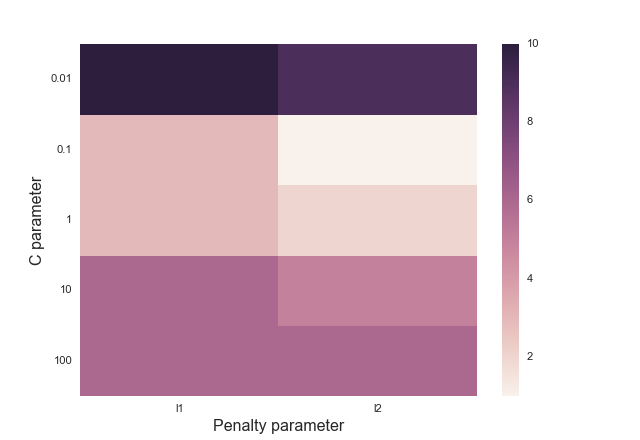

In [60]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    # rotate the yticks, by default they are along an axis
    plt.yticks(rotation=0)
    plt.ylabel('C parameter', size = 'large')
    plt.xlabel('Penalty parameter', size = 'large')

#GridSearch_Heatmap(answer_six())
GridSearch_Heatmap(rez['rank_test_score'].reshape(5,2))